# DT Classification with NaN Handling

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [27]:
df_real = pd.read_csv('../data/data_real.csv')
df_fake = pd.read_csv('../data/data_fake.csv')

In [30]:
df=pd.concat([df_real,df_fake],ignore_index=True)

In [34]:
df.shape

(17349, 31)

In [35]:
df.dropna(inplace=True)

In [36]:
targets = df['real_account'].values
df=df.loc[:,'profile_pic':'highlight_reel_count'] #Remove the statistics
df.drop(['follows_count', 'followed_by_count'],axis=1,inplace=True)
df.shape

(13001, 9)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size = 0.2, random_state = 12345)

In [41]:
dtc = DecisionTreeClassifier(random_state=0,max_depth=4)

In [42]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
dtc_pred = dtc.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
print(confusion_matrix(y_test, dtc_pred))

[[ 951  220]
 [  91 1339]]


In [46]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

       False       0.91      0.81      0.86      1171
        True       0.86      0.94      0.90      1430

    accuracy                           0.88      2601
   macro avg       0.89      0.87      0.88      2601
weighted avg       0.88      0.88      0.88      2601



In [47]:
from sklearn import tree
import pydotplus
from IPython.display import Image

features=list(df.columns[0:11])


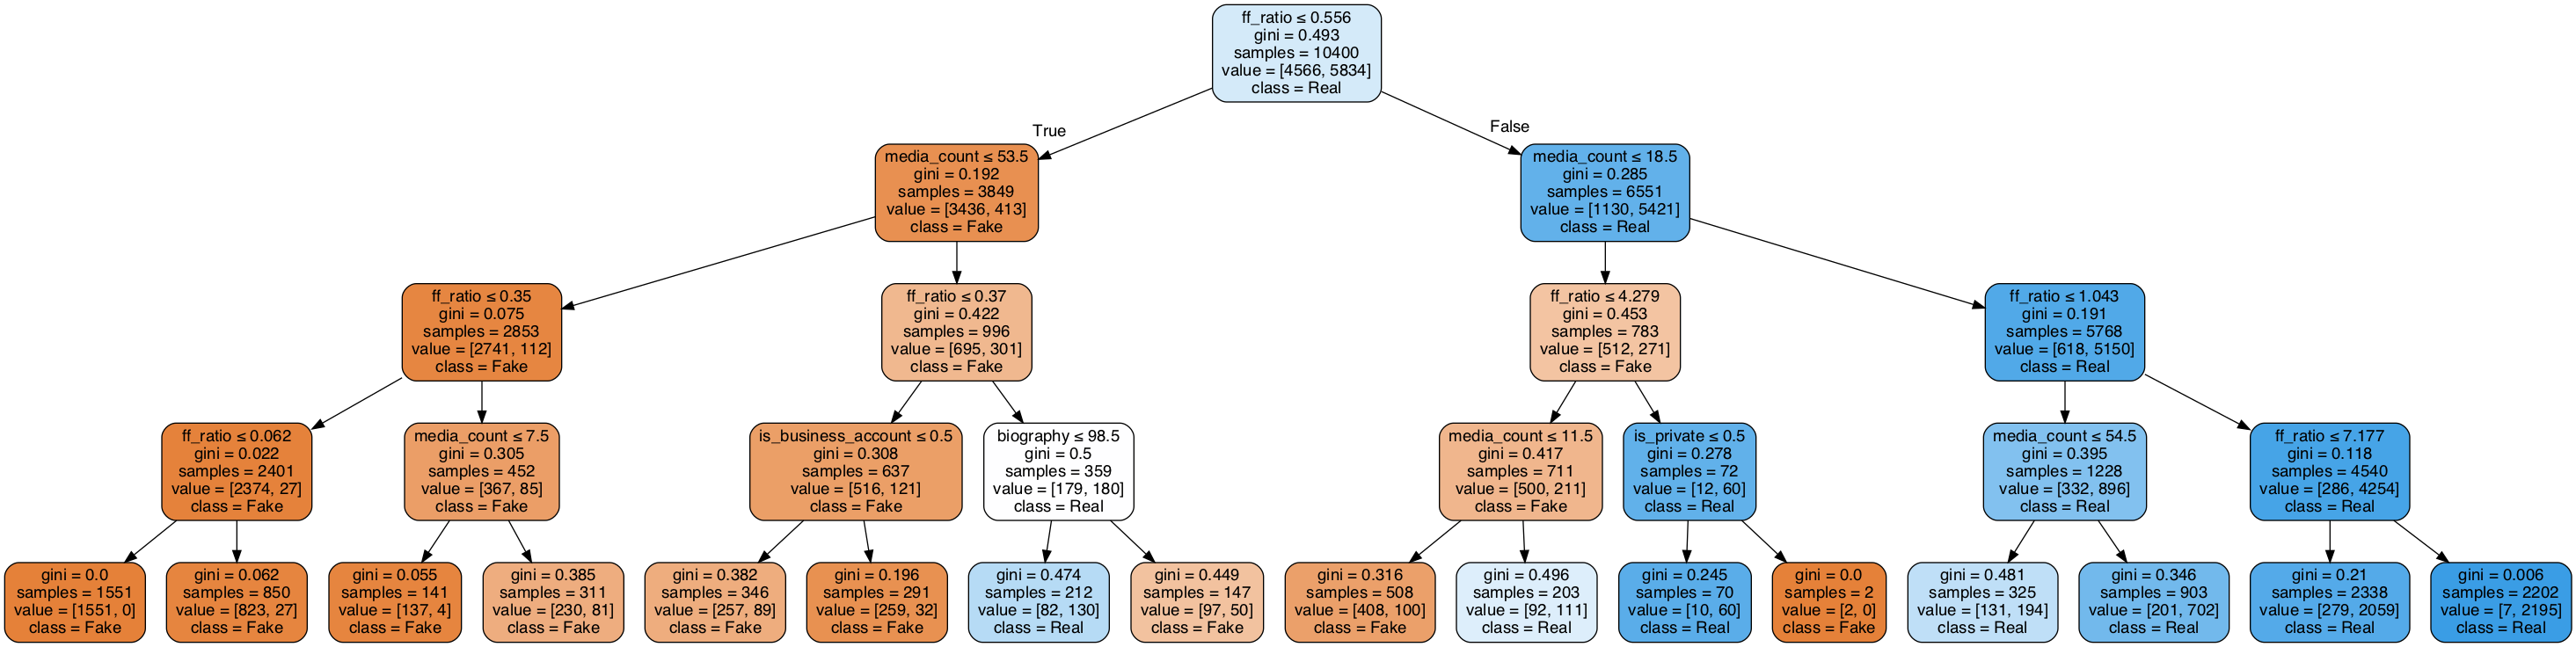

In [48]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  